# Peso de la evidencia

In [1]:
import pandas as pd
import numpy as np
import mitosheet

In [2]:
df = pd.read_csv("german_credit.csv")


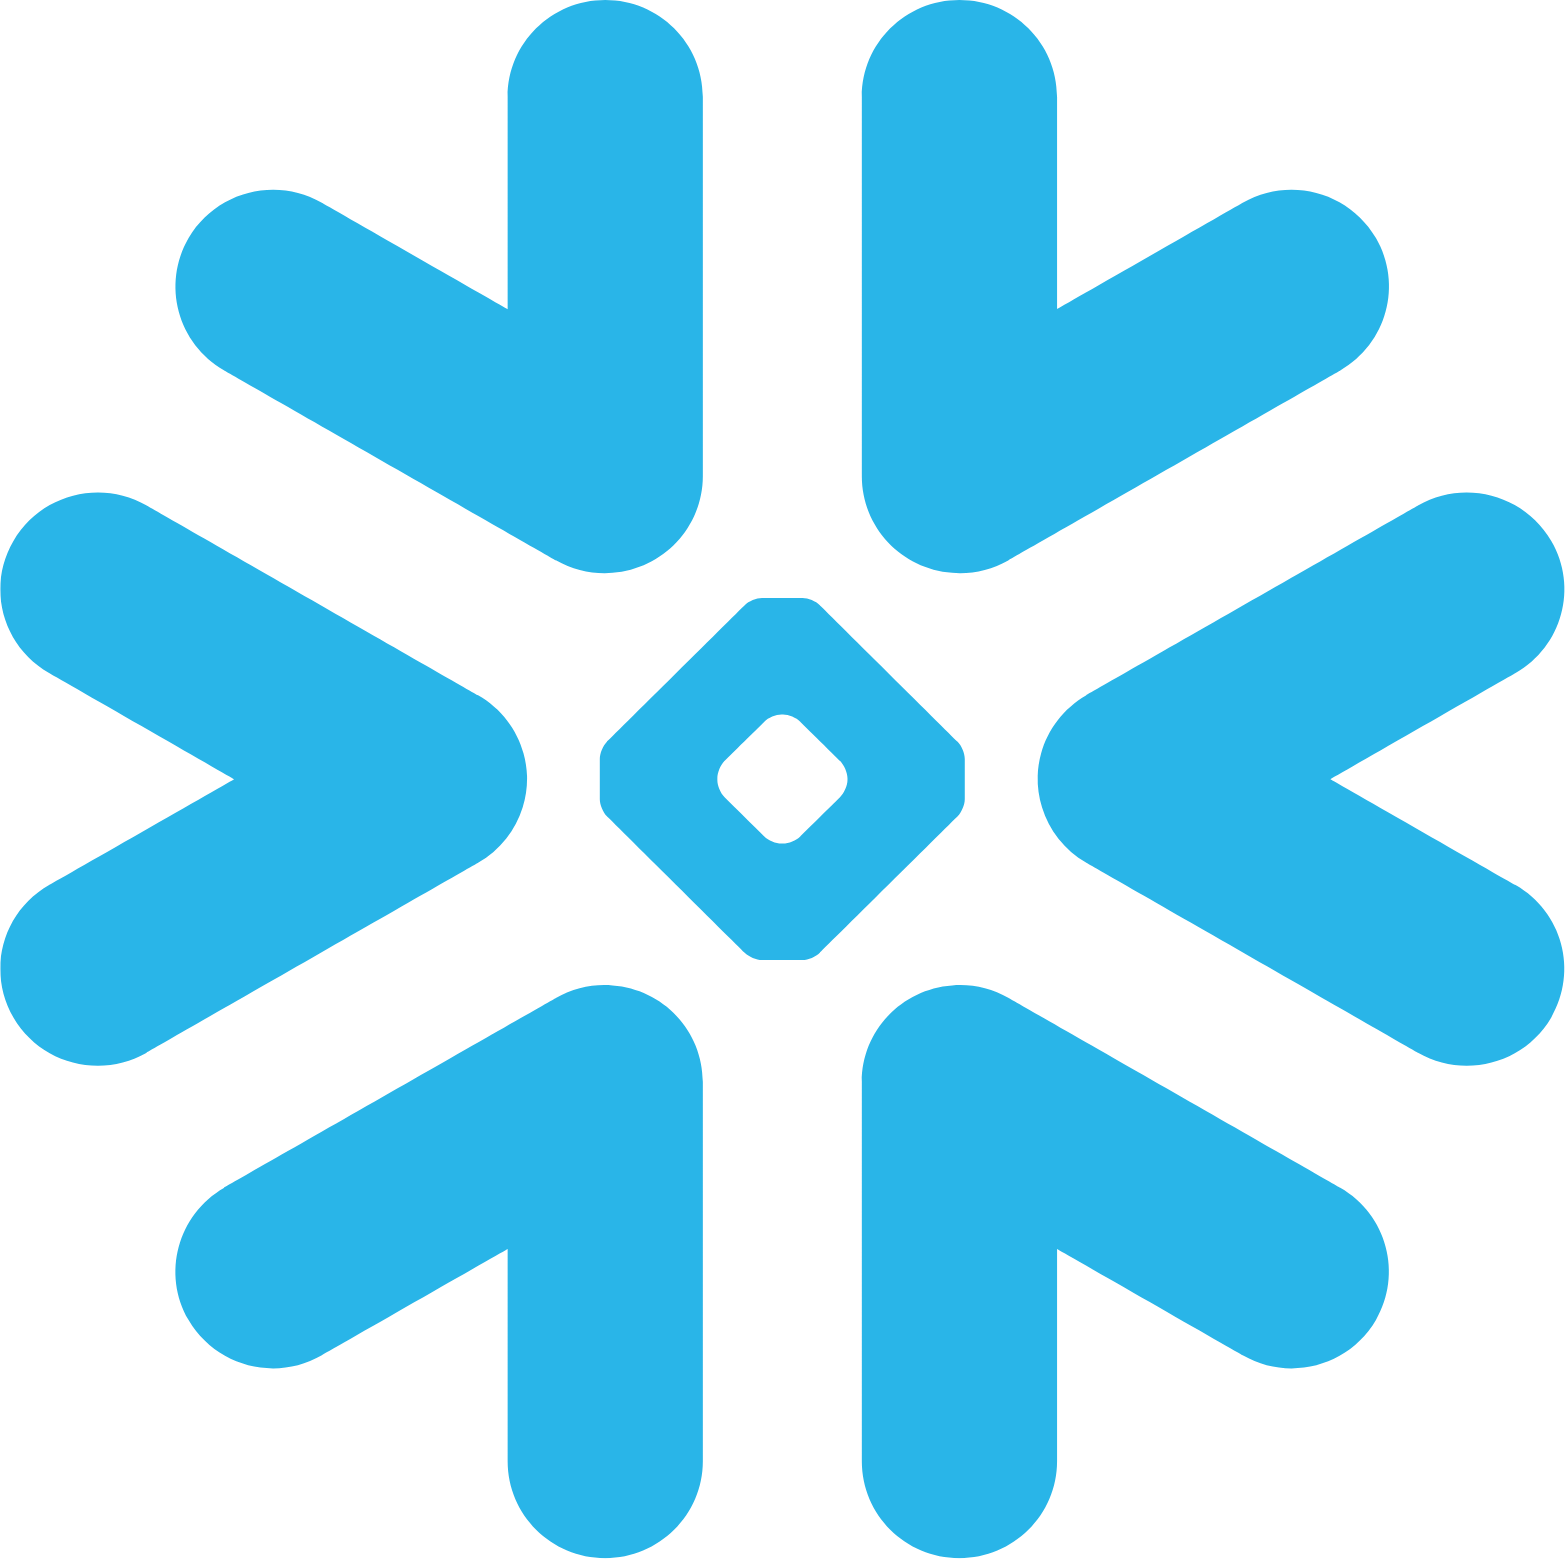

In [3]:
mitosheet.sheet(df, analysis_to_replay="id-mupcrxyldc")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [5]:
#Transforming the dependent variable. Good - 1, Bad - 0.
df["default"].replace([0,1],[1,0], inplace=True)

In [6]:
# Get the dummies and concatenate with the original dataframe
datos_dummies = [pd.get_dummies(df["account_check_status"], prefix="Account_check", prefix_sep="_"),
                 pd.get_dummies(df["credit_history"], prefix="Credit_history", prefix_sep="_"),
                 pd.get_dummies(df["purpose"], prefix="Purpose", prefix_sep="_"),
                 pd.get_dummies(df["savings"], prefix="Savings", prefix_sep="_"),
                 pd.get_dummies(df["present_emp_since"], prefix="Present_emp_since", prefix_sep="_"),
                 pd.get_dummies(df["personal_status_sex"], prefix="Personal_status_sex", prefix_sep="_"),
                 pd.get_dummies(df["other_debtors"], prefix="Other_debtors", prefix_sep="_"),
                 pd.get_dummies(df["property"], prefix="Property", prefix_sep="_"),
                 pd.get_dummies(df["other_installment_plans"], prefix="Other_installment_plans", prefix_sep="_"),
                 pd.get_dummies(df["housing"], prefix="Housing", prefix_sep="_"),
                 pd.get_dummies(df["job"], prefix="Job", prefix_sep="_"),
                 pd.get_dummies(df["telephone"], prefix="Telephone", prefix_sep="_"),
                 pd.get_dummies(df["foreign_worker"], prefix="Foreign_worker", prefix_sep="_")]

In [7]:
datos_dummies = pd.concat(datos_dummies, axis=1)

In [10]:
datos_dummies.head()

Account_check_0 <= ... < 200 DM  Account_check_< 0 DM  \
0                                0                     1   
1                                1                     0   
2                                0                     0   
3                                0                     1   
4                                0                     1   

   Account_check_>= 200 DM / salary assignments for at least 1 year  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Account_check_no checking account  \
0                                  0   
1                                  0   
2                                  1   
3                                  0   
4                                  0   

   Credit_history_all credits at this bank paid back duly  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Credit_history_critical account/ other credits existing (not at this bank)  \
0                                                  1                            
1                                                  0                            
2                                                  1                            
3                                                  0                            
4                                                  0                            

   Credit_history_delay in paying off in the past  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   Credit_history_existing credits paid back duly till now  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Credit_history_no credits taken/ all credits paid back duly  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   Purpose_(vacation - does not exist?)  ...  Housing_own  Housing_rent  \
0                                     0  ...            1             0   
1                                     0  ...            1             0   
2                                     1  ...            1             0   
3                                     0  ...            0             0   
4                                     0  ...            0             0   

   Job_management/ self-employed/ highly qualified employee/ officer  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Job_skilled employee / official  Job_unemployed/ unskilled - non-resident  \
0                                1                                 

In [9]:
datos_dummies.shape

(1000, 54)

In [11]:
datos_concatenados = pd.concat([df, datos_dummies], axis=1)

In [12]:
datos_concatenados.head()

default account_check_status  duration_in_month  \
0        1               < 0 DM                  6   
1        0    0 <= ... < 200 DM                 48   
2        1  no checking account                 12   
3        1               < 0 DM                 42   
4        0               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex  ... Housing_own  Housing_rent  \
0                        male : single  ...           1             0   
1  female : divorced/separated/married  ...           1             0   
2                        male : single  ...           1             0   
3                        male : single  ...           0             0   
4                        male : single  ...           0             0   

  Job_management/ self-employed/ highly qualified employee/ officer  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Job_skilled employee / official Job_unemployed/ unskilled - non-resident  \
0                                1                                        0   
1                                1                                        0   
2                                0                                        0   
3                                1                                        0   
4                                1                                        0   

  Job_unskilled - resident  Telephone_none  \
0                        0               0   
1                        0               1   
2                        1               1   
3                        0               1   
4                        0               1   

  Telephone_yes, registered under the customers name   Foreign_worker_no  \
0                                                  1                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

  Foreign_worker_yes  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 75 columns]

In [13]:
# Splitting the data base
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(datos_concatenados.drop("default", axis=1), datos_concatenados["default"], test_size=0.1,random_state=99)

In [210]:
# Run this after everything is done
#X_train = X_test
#y_train = y_test

In [213]:
X_train.shape

(100, 74)

In [214]:
y_train.shape

(100,)

# Preprocess Categorical Values

> Get the Weight of Evidence which is WoE = ln(%Good/%Bad), remember that we changed the values in the default variable so the model can be more explainable, '1' is for good credit owners and '0' for defaulters.

> WoE can be described as a separation measurement between good and bad clients

In [215]:
list(X_train["account_check_status"].unique())

['< 0 DM',
 '0 <= ... < 200 DM',
 'no checking account',
 '>= 200 DM / salary assignments for at least 1 year']

In [216]:
db = pd.concat([X_train["account_check_status"], y_train], axis=1)

In [217]:
db.head()

account_check_status  default
890               < 0 DM        1
983               < 0 DM        0
107    0 <= ... < 200 DM        1
609  no checking account        1
113  no checking account        0

In [218]:
# Fill in a table with with the count of "Good" observations in each category 
db.groupby(db.columns.values[0], as_index=False)[db.columns.values[1]].count()

account_check_status  default
0                                  0 <= ... < 200 DM       21
1                                             < 0 DM       30
2  >= 200 DM / salary assignments for at least 1 ...        7
3                                no checking account       42

In [219]:
# Now the average of "Goods" in each category
db.groupby(db.columns.values[0], as_index=False)[db.columns.values[1]].mean()

account_check_status   default
0                                  0 <= ... < 200 DM  0.428571
1                                             < 0 DM  0.500000
2  >= 200 DM / salary assignments for at least 1 ...  0.857143
3                                no checking account  0.880952

In [220]:
df1 = pd.concat([db.groupby(db.columns.values[0], as_index=False)[db.columns.values[1]].count(),
                 db.groupby(db.columns.values[0], as_index=False)[db.columns.values[1]].mean()], axis=1)

In [221]:
df1.head()

account_check_status  default  \
0                                  0 <= ... < 200 DM       21   
1                                             < 0 DM       30   
2  >= 200 DM / salary assignments for at least 1 ...        7   
3                                no checking account       42   

                                account_check_status   default  
0                                  0 <= ... < 200 DM  0.428571  
1                                             < 0 DM  0.500000  
2  >= 200 DM / salary assignments for at least 1 ...  0.857143  
3                                no checking account  0.880952

In [222]:
df1 = df1.iloc[:, [0,1,3]]
df1.head()

account_check_status  default   default
0                                  0 <= ... < 200 DM       21  0.428571
1                                             < 0 DM       30  0.500000
2  >= 200 DM / salary assignments for at least 1 ...        7  0.857143
3                                no checking account       42  0.880952

In [223]:
df1.columns = [df1.columns.values[0], 'observaciones', 'prop_bueno']

In [224]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  
0    0.428571  
1    0.500000  
2    0.857143  
3    0.880952

In [225]:
# Calculate the number of observations in each category divided  by the total amount of observations
df1["proporcion_obs"] = df1["observaciones"]/df1["observaciones"].sum()

In [226]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  
0    0.428571            0.21  
1    0.500000            0.30  
2    0.857143            0.07  
3    0.880952            0.42

In [227]:
# Estimate the number of goods and bads in each category
df1["n_buenos"] = df1["prop_bueno"]*df1["observaciones"]

In [228]:
# ...now the number of bads
df1["n_malos"] = (1-df1["prop_bueno"])*df1["observaciones"]

In [229]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  
0    0.428571            0.21       9.0     12.0  
1    0.500000            0.30      15.0     15.0  
2    0.857143            0.07       6.0      1.0  
3    0.880952            0.42      37.0      5.0

In [230]:
# Now we can calculate the proportion of goods and bads for each category
# i.e, the number of goods in the category divided by the total amount of goods in all the base... and the same for the bads
df1["prop_n_buenos"] = df1["n_buenos"]/df1["n_buenos"].sum()

In [231]:
# now for the bads
df1["prop_n_malos"] = df1["n_malos"]/df1["n_malos"].sum()

In [232]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  
0    0.428571            0.21       9.0     12.0       0.134328      0.363636  
1    0.500000            0.30      15.0     15.0       0.223881      0.454545  
2    0.857143            0.07       6.0      1.0       0.089552      0.030303  
3    0.880952            0.42      37.0      5.0       0.552239      0.151515

In [233]:
# Now we can calculate the WoE for each category
# WoE (PdE) = Ln(%Buenos/%Malos)

In [234]:
df1["PdE"] = np.log(df1["prop_n_buenos"]/df1["prop_n_malos"])

In [235]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.428571            0.21       9.0     12.0       0.134328      0.363636   
1    0.500000            0.30      15.0     15.0       0.223881      0.454545   
2    0.857143            0.07       6.0      1.0       0.089552      0.030303   
3    0.880952            0.42      37.0      5.0       0.552239      0.151515   

        PdE  
0 -0.995867  
1 -0.708185  
2  1.083574  
3  1.293295

> Now we will order based on the WoE (PdE), from smalles to highest

> These means that for those who have the highest probability of default will be first in the list 

In [236]:
df1 = df1.sort_values(["PdE"])
df1 = df1.reset_index(drop=True)

In [237]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.428571            0.21       9.0     12.0       0.134328      0.363636   
1    0.500000            0.30      15.0     15.0       0.223881      0.454545   
2    0.857143            0.07       6.0      1.0       0.089552      0.030303   
3    0.880952            0.42      37.0      5.0       0.552239      0.151515   

        PdE  
0 -0.995867  
1 -0.708185  
2  1.083574  
3  1.293295

# Information Value

> It helps to determine which variables have more predictive power or influence in the value of a dependent variable.

> Remember that with the WoE we evaluate the weight of each category within each variable, now we will evaluate the global power of the variable.

In [238]:
df1["VI"] = df1["PdE"]*(df1["prop_n_buenos"]-df1["prop_n_malos"])

In [239]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.428571            0.21       9.0     12.0       0.134328      0.363636   
1    0.500000            0.30      15.0     15.0       0.223881      0.454545   
2    0.857143            0.07       6.0      1.0       0.089552      0.030303   
3    0.880952            0.42      37.0      5.0       0.552239      0.151515   

        PdE        VI  
0 -0.995867  0.228360  
1 -0.708185  0.163353  
2  1.083574  0.064201  
3  1.293295  0.518254

In [240]:
df1["sumatoriaVI"] = df1["VI"].sum()

In [241]:
df1

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.428571            0.21       9.0     12.0       0.134328      0.363636   
1    0.500000            0.30      15.0     15.0       0.223881      0.454545   
2    0.857143            0.07       6.0      1.0       0.089552      0.030303   
3    0.880952            0.42      37.0      5.0       0.552239      0.151515   

        PdE        VI  sumatoriaVI  
0 -0.995867  0.228360     0.974169  
1 -0.708185  0.163353     0.974169  
2  1.083574  0.064201     0.974169  
3  1.293295  0.518254     0.974169

> Now we shall se that the value of the last column (sumatoriaVI) is a global value for the variable and it tells us that if the predictor has a value under '0.6462' it would be useless

# Automate Categorical Variable Preprocessing

In [242]:
def PdE_categorica(df, var_categorica, df_var_dependiente):
    df = pd.concat([df[var_categorica], df_var_dependiente], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'observaciones', 'prop_bueno']
    df['proporcion_obs'] = df['observaciones']/df['observaciones'].sum()
    df['n_buenos'] = df['prop_bueno']*df['observaciones']
    df['n_malos'] = (1- df['prop_bueno'])*df['observaciones'] 
    df['prop_n_buenos'] = df['n_buenos']/df['n_buenos'].sum()
    df['prop_n_malos'] = df['n_malos']/df['n_malos'].sum() 
    df['PdE'] = np.log(df['prop_n_buenos']/df['prop_n_malos'])
    df = df.sort_values(['PdE'])
    df = df.reset_index(drop = True)
    df['delta_prop_n_buenos'] = df['prop_n_buenos'].diff().abs() 
    df['delta_PdE'] = df['PdE'].diff().abs() #Diferencia Absoluta entre categorías
    df['VI'] = (df['prop_n_buenos'] - df['prop_n_malos']) * df['PdE']
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df['sumatoriaVI'] = df['VI'].sum()
    return df

In [243]:
# Lets make a test using the function
df_prueba = PdE_categorica(X_train, "account_check_status", y_train)

In [244]:
df_prueba

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.428571            0.21       9.0     12.0       0.134328      0.363636   
1    0.500000            0.30      15.0     15.0       0.223881      0.454545   
2    0.857143            0.07       6.0      1.0       0.089552      0.030303   
3    0.880952            0.42      37.0      5.0       0.552239      0.151515   

        PdE  delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0 -0.995867                  NaN        NaN  0.228360     0.974169  
1 -0.708185             0.089552   0.287682  0.163353     0.974169  
2  1.083574             0.134328   1.791759  0.064201     0.974169  
3  1.293295             0.462687   0.209721  0.518254     0.974169

In [245]:
## WE GOT THE SAME RESULT

# Graph between the Independet (Categorical) vs PdE

> X-axis will contain the labels of the categories of the variable and the y-axis will have the numbers of PdE

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [247]:
def grafico_PdE(df):
    x = np.array(df.iloc[:,0].apply(str)) 
    y = df["PdE"]
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, marker="x", linestyle="--", color="magenta")
    plt.xlabel(df.columns[0])
    plt.ylabel('Peso de la Evidencia (PdE)')
    plt.title(str('Peso de la evidencia por ' + df.columns[0]))

In [248]:
# Lets test it

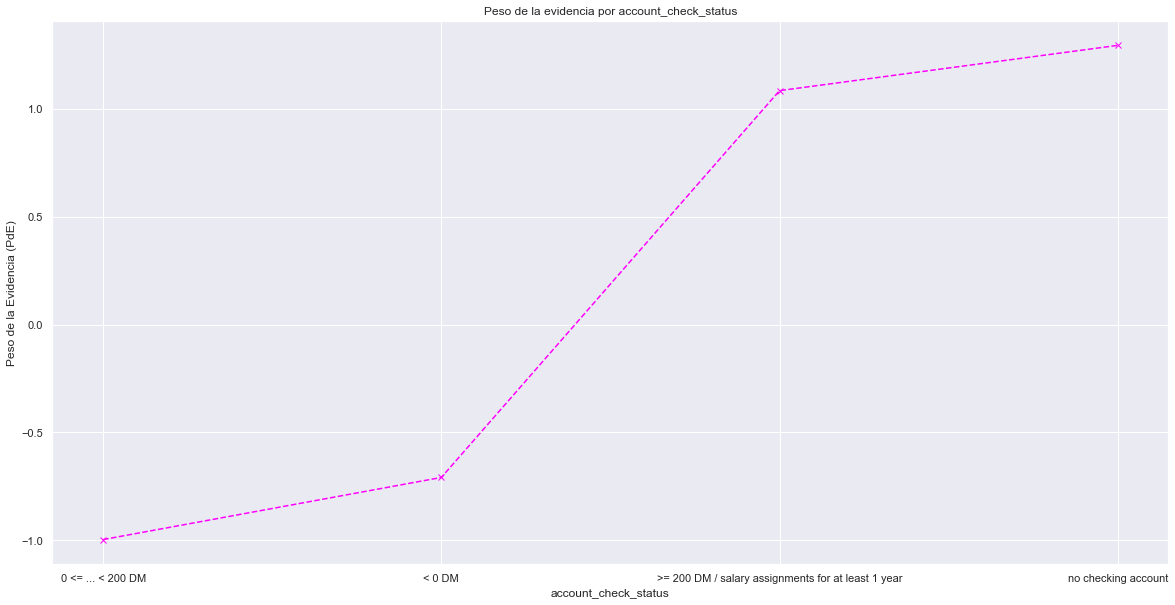

In [249]:
grafico_PdE(df_prueba)

In [250]:
df_prueba

account_check_status  observaciones  \
0                                  0 <= ... < 200 DM             21   
1                                             < 0 DM             30   
2  >= 200 DM / salary assignments for at least 1 ...              7   
3                                no checking account             42   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.428571            0.21       9.0     12.0       0.134328      0.363636   
1    0.500000            0.30      15.0     15.0       0.223881      0.454545   
2    0.857143            0.07       6.0      1.0       0.089552      0.030303   
3    0.880952            0.42      37.0      5.0       0.552239      0.151515   

        PdE  delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0 -0.995867                  NaN        NaN  0.228360     0.974169  
1 -0.708185             0.089552   0.287682  0.163353     0.974169  
2  1.083574             0.134328   1.791759  0.064201     0.974169  
3  1.293295             0.462687   0.209721  0.518254     0.974169

In [251]:
# As we can see the PdE for the first categories is very low and the proportion of observations for the third category is 0.062222 so these 3 will be merged 
# into 1 single category.

## Creating Dummies

In [252]:
list(X_train.columns)

['account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker',
 'Account_check_0 <= ... < 200 DM',
 'Account_check_< 0 DM',
 'Account_check_>= 200 DM / salary assignments for at least 1 year',
 'Account_check_no checking account',
 'Credit_history_all credits at this bank paid back duly',
 'Credit_history_critical account/ other credits existing (not at this bank)',
 'Credit_history_delay in paying off in the past',
 'Credit_history_existing credits paid back duly till now',
 'Credit_history_no credits taken/ all credits paid back duly',
 'Purpose_(vacation - does not exist?)',
 'Purpose_business',
 'Purpose_car (new)',
 'Purpose_car (used)',
 'Purpose_domestic appliances',
 '

In [253]:
# Create the dummie Account_check_status_first3

In [254]:
X_train["Account_check_status_first2"] = sum([X_train["Account_check_0 <= ... < 200 DM"],
                                              X_train["Account_check_< 0 DM"]])

In [255]:
X_train["Account_check_status_last2"] = sum([X_train["Account_check_>= 200 DM / salary assignments for at least 1 year"],
                                              X_train["Account_check_no checking account"]])

# Now for the rest of Categorical Variables

In [256]:
df_prueba = PdE_categorica(X_train, "credit_history", y_train)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [257]:
df_prueba

credit_history  observaciones  \
0            all credits at this bank paid back duly              2   
1       no credits taken/ all credits paid back duly              8   
2                    delay in paying off in the past              6   
3           existing credits paid back duly till now             56   
4  critical account/ other credits existing (not ...             28   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.000000            0.02       0.0      2.0       0.000000      0.060606   
1    0.375000            0.08       3.0      5.0       0.044776      0.151515   
2    0.500000            0.06       3.0      3.0       0.044776      0.090909   
3    0.714286            0.56      40.0     16.0       0.597015      0.484848   
4    0.750000            0.28      21.0      7.0       0.313433      0.212121   

        PdE  delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0       NaN                  NaN        NaN       NaN     0.225684  
1 -1.219011             0.044776        NaN  0.130116     0.225684  
2 -0.708185             0.000000   0.510826  0.032671     0.225684  
3  0.208106             0.552239   0.916291  0.023342     0.225684  
4  0.390427             0.283582   0.182322  0.039555     0.225684

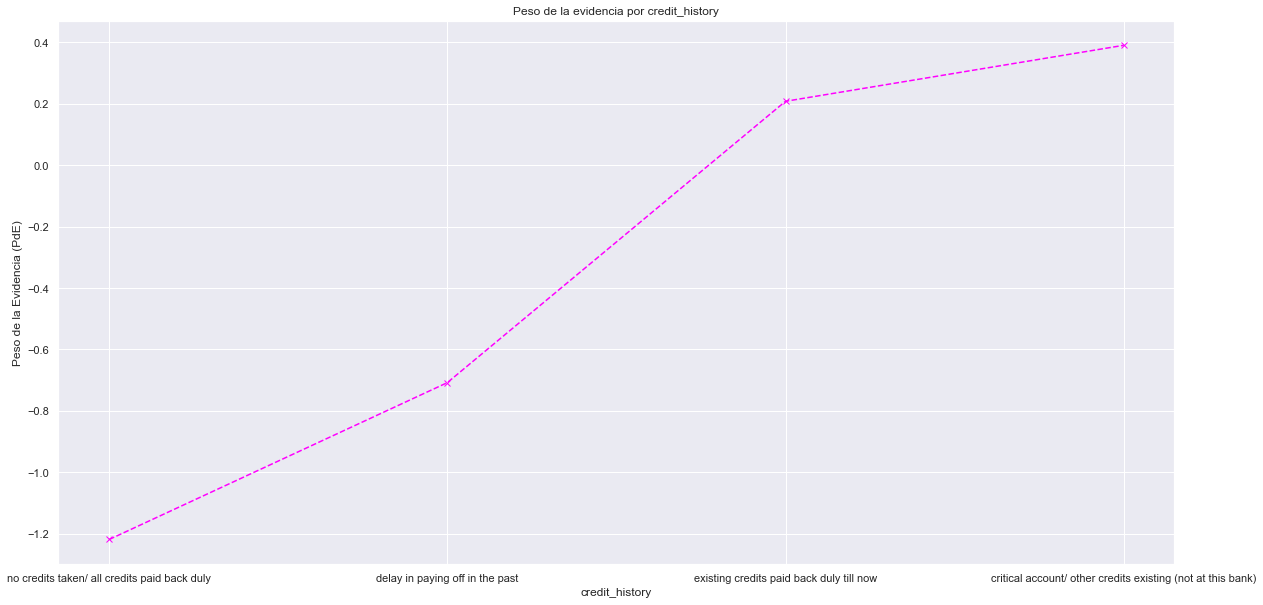

In [258]:
grafico_PdE(df_prueba)

In [259]:
# 3 different groups, with the last one but that goes by itself
X_train["Credit_history_team1"] = sum([X_train["Credit_history_no credits taken/ all credits paid back duly"],
                                        X_train["Credit_history_all credits at this bank paid back duly"]])
                                       
                            
X_train["Credit_history_team2"] = sum([X_train["Credit_history_existing credits paid back duly till now"],
                                        X_train["Credit_history_delay in paying off in the past"]])

In [260]:
df_prueba = PdE_categorica(X_train, "purpose", y_train)

In [261]:
df_prueba

purpose  observaciones  prop_bueno  proporcion_obs  \
0                       repairs              3    0.333333            0.03   
1  (vacation - does not exist?)              2    0.500000            0.02   
2                      business              9    0.555556            0.09   
3                     car (new)             30    0.566667            0.30   
4              radio/television             17    0.647059            0.17   
5                    car (used)              8    0.750000            0.08   
6           domestic appliances             28    0.821429            0.28   
7                     education              1    1.000000            0.01   
8                    retraining              2    1.000000            0.02   

   n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0       1.0      2.0       0.014925      0.060606 -1.401332   
1       1.0      1.0       0.014925      0.030303 -0.708185   
2       5.0      4.0       0.074627      0.121212 -0.485042   
3      17.0     13.0       0.253731      0.393939 -0.439921   
4      11.0      6.0       0.164179      0.181818 -0.102049   
5       6.0      2.0       0.089552      0.060606  0.390427   
6      23.0      5.0       0.343284      0.151515  0.817871   
7       1.0      0.0       0.014925      0.000000       NaN   
8       2.0      0.0       0.029851      0.000000       NaN   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.064014     0.329124  
1             0.000000   0.693147  0.010890     0.329124  
2             0.059701   0.223144  0.022596     0.329124  
3             0.179104   0.045120  0.061680     0.329124  
4             0.089552   0.337872  0.001800     0.329124  
5             0.074627   0.492476  0.011301     0.329124  
6             0.253731   0.427444  0.156842     0.329124  
7             0.328358        NaN       NaN     0.329124  
8             0.014925        NaN       NaN     0.329124

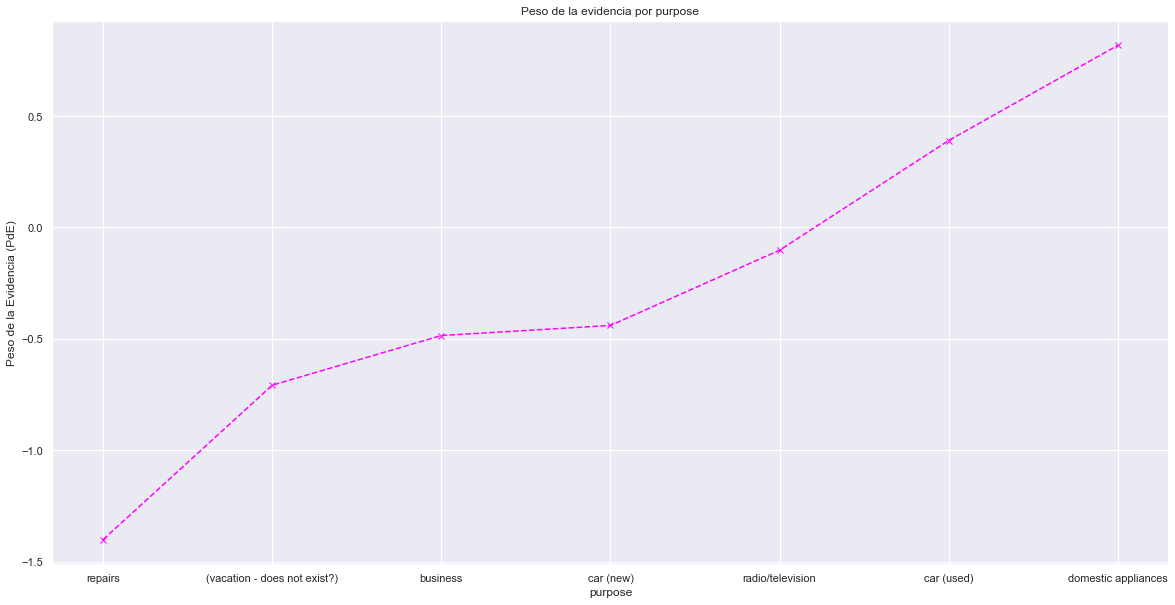

In [262]:
grafico_PdE(df_prueba)

In [263]:
X_train["Purpose_vacation_forniture_education"] = sum([X_train["Purpose_(vacation - does not exist?)"],
                                                      X_train["Purpose_furniture/equipment"],
                                                      X_train["Purpose_education"]])
X_train["Purpose_repairs_carUsed_retraining"] = sum([X_train["Purpose_repairs"],
                                                    X_train["Purpose_car (used)"],
                                                    X_train["Purpose_retraining"]])

In [264]:
df_prueba = PdE_categorica(X_train, "savings", y_train)

In [265]:
df_prueba

savings  observaciones  prop_bueno  proporcion_obs  \
0          100 <= ... < 500 DM             10    0.500000            0.10   
1                 ... < 100 DM             62    0.645161            0.62   
2  unknown/ no savings account             17    0.705882            0.17   
3        500 <= ... < 1000 DM               8    0.875000            0.08   
4               .. >= 1000 DM               3    1.000000            0.03   

   n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0       5.0      5.0       0.074627      0.151515 -0.708185   
1      40.0     22.0       0.597015      0.666667 -0.110348   
2      12.0      5.0       0.179104      0.151515  0.167284   
3       7.0      1.0       0.104478      0.030303  1.237725   
4       3.0      0.0       0.044776      0.000000       NaN   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.054451      0.15856  
1             0.522388   0.597837  0.007686      0.15856  
2             0.417910   0.277632  0.004615      0.15856  
3             0.074627   1.070441  0.091808      0.15856  
4             0.059701        NaN       NaN      0.15856

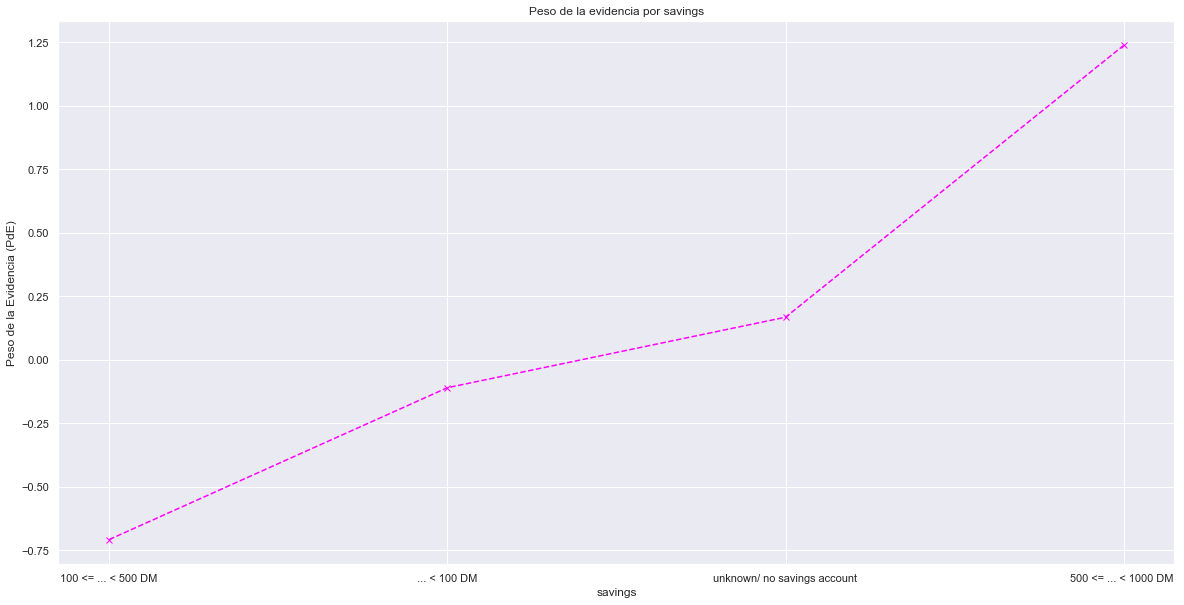

In [266]:
grafico_PdE(df_prueba)

In [267]:
# For savings all the categories will have their own dummie column

In [268]:
df_prueba = PdE_categorica(X_train, "present_emp_since", y_train)

In [269]:
df_prueba

present_emp_since  observaciones  prop_bueno  proporcion_obs  n_buenos  \
0  1 <= ... < 4 years             33    0.575758            0.33      19.0   
1  4 <= ... < 7 years             14    0.642857            0.14       9.0   
2       ... < 1 year              19    0.684211            0.19      13.0   
3          unemployed              7    0.714286            0.07       5.0   
4       .. >= 7 years             27    0.777778            0.27      21.0   

   n_malos  prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  \
0     14.0       0.283582      0.424242 -0.402803                  NaN   
1      5.0       0.134328      0.151515 -0.120398             0.149254   
2      6.0       0.194030      0.181818  0.065005             0.059701   
3      2.0       0.074627      0.060606  0.208106             0.119403   
4      6.0       0.313433      0.181818  0.544578             0.238806   

   delta_PdE        VI  sumatoriaVI  
0        NaN  0.056658     0.134114  
1   0.282405  0.002069     0.134114  
2   0.185403  0.000794     0.134114  
3   0.143101  0.002918     0.134114  
4   0.336472  0.071674     0.134114

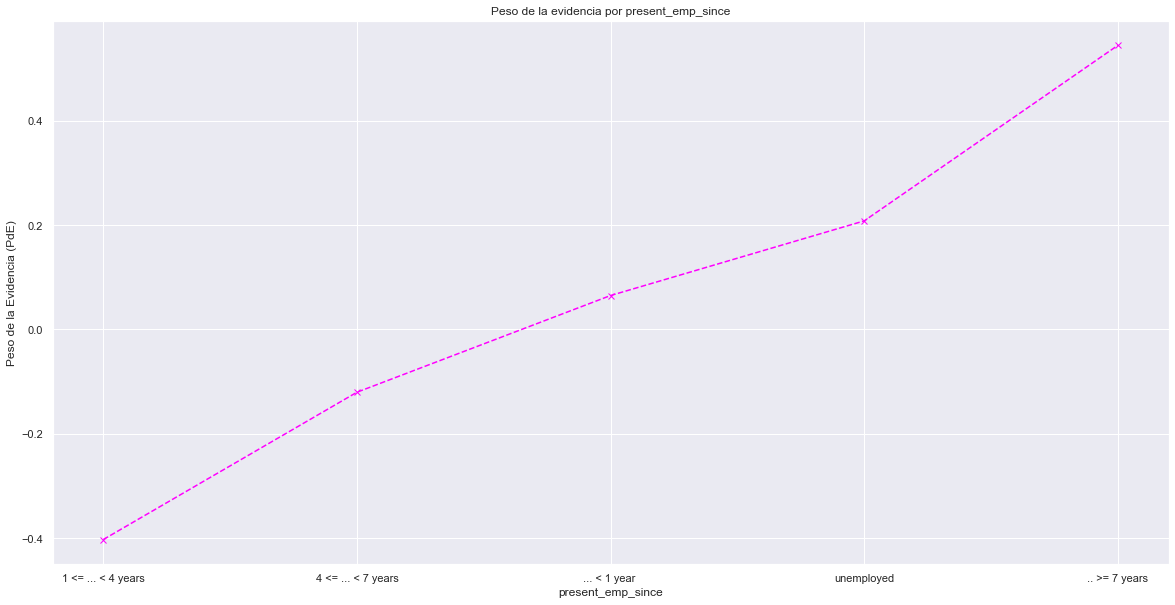

In [270]:
grafico_PdE(df_prueba)

In [271]:
X_train["Present_emp_since_unemployed_less1"] = sum([X_train["Present_emp_since_... < 1 year "],
                                                      X_train["Present_emp_since_unemployed"]])

In [272]:
df_prueba = PdE_categorica(X_train, "personal_status_sex", y_train)

In [273]:
df_prueba

personal_status_sex  observaciones  prop_bueno  \
0  female : divorced/separated/married             28    0.607143   
1                        male : single             57    0.649123   
2               male : married/widowed             12    0.833333   
3            male : divorced/separated              3    1.000000   

   proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0            0.28      17.0     11.0       0.253731      0.333333 -0.272867   
1            0.57      37.0     20.0       0.552239      0.606061 -0.092999   
2            0.12      10.0      2.0       0.149254      0.060606  0.901253   
3            0.03       3.0      0.0       0.044776      0.000000       NaN   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.021721      0.10662  
1             0.298507   0.179868  0.005005      0.10662  
2             0.402985   0.994252  0.079894      0.10662  
3             0.104478        NaN       NaN      0.10662

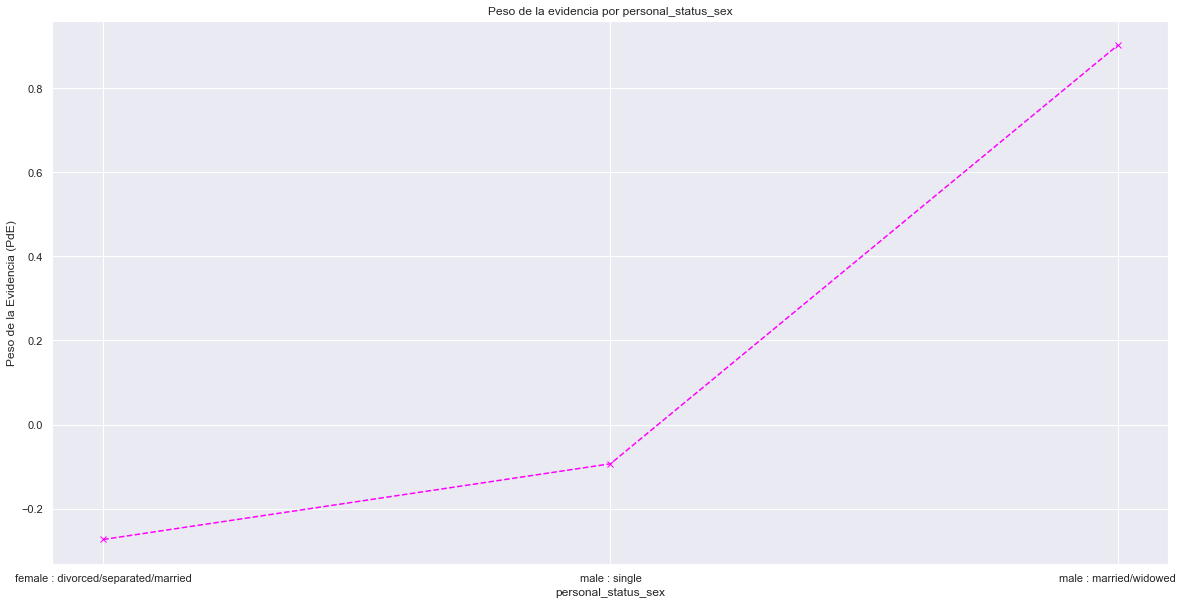

In [274]:
grafico_PdE(df_prueba)

In [275]:
## Personal_status_sex will have its own column

In [276]:
df_prueba = PdE_categorica(X_train, "other_debtors", y_train)
df_prueba

other_debtors  observaciones  prop_bueno  proporcion_obs  n_buenos  n_malos  \
0  co-applicant              6    0.333333            0.06       2.0      4.0   
1          none             87    0.689655            0.87      60.0     27.0   
2     guarantor              7    0.714286            0.07       5.0      2.0   

   prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  delta_PdE  \
0       0.029851      0.121212 -1.401332                  NaN        NaN   
1       0.895522      0.818182  0.090323             0.865672   1.491655   
2       0.074627      0.060606  0.208106             0.820896   0.117783   

         VI  sumatoriaVI  
0  0.128028     0.137931  
1  0.006986     0.137931  
2  0.002918     0.137931

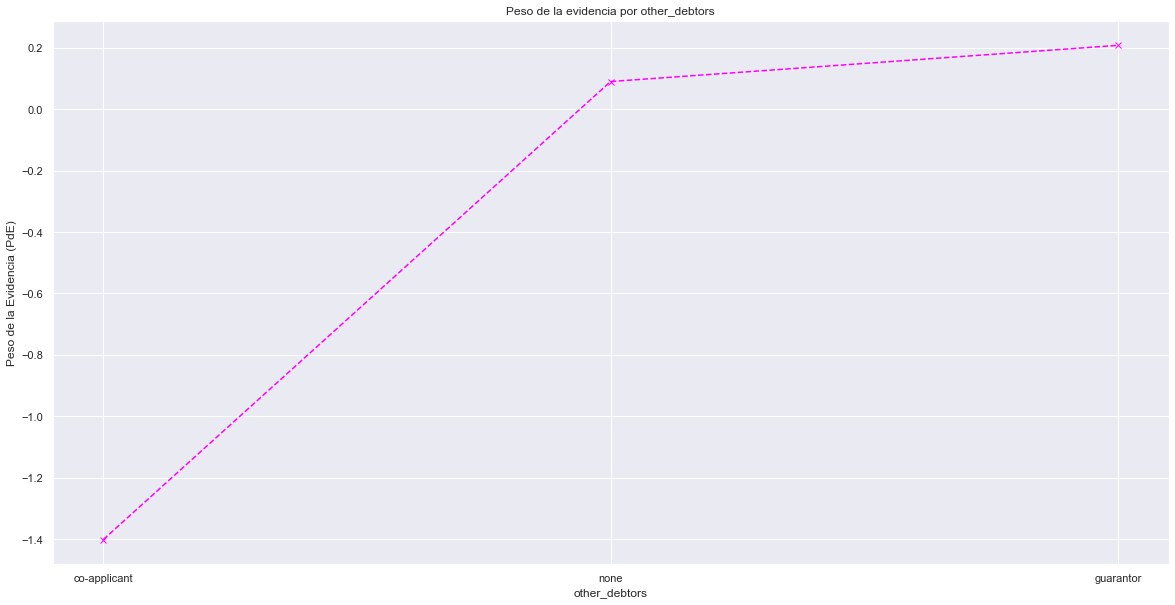

In [277]:
grafico_PdE(df_prueba)

In [278]:
df_prueba = PdE_categorica(X_train, "property", y_train)
df_prueba

property  observaciones  \
0                              unknown / no property             13   
1                                        real estate             31   
2  if not A121 : building society savings agreeme...             23   
3  if not A121/A122 : car or other, not in attrib...             33   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.538462            0.13       7.0      6.0       0.104478      0.181818   
1    0.677419            0.31      21.0     10.0       0.313433      0.303030   
2    0.695652            0.23      16.0      7.0       0.238806      0.212121   
3    0.696970            0.33      23.0     10.0       0.343284      0.303030   

        PdE  delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0 -0.554034                  NaN        NaN  0.042849     0.051383  
1  0.033752             0.208955   0.587787  0.000351     0.051383  
2  0.118494             0.074627   0.084741  0.003162     0.051383  
3  0.124724             0.104478   0.006231  0.005021     0.051383

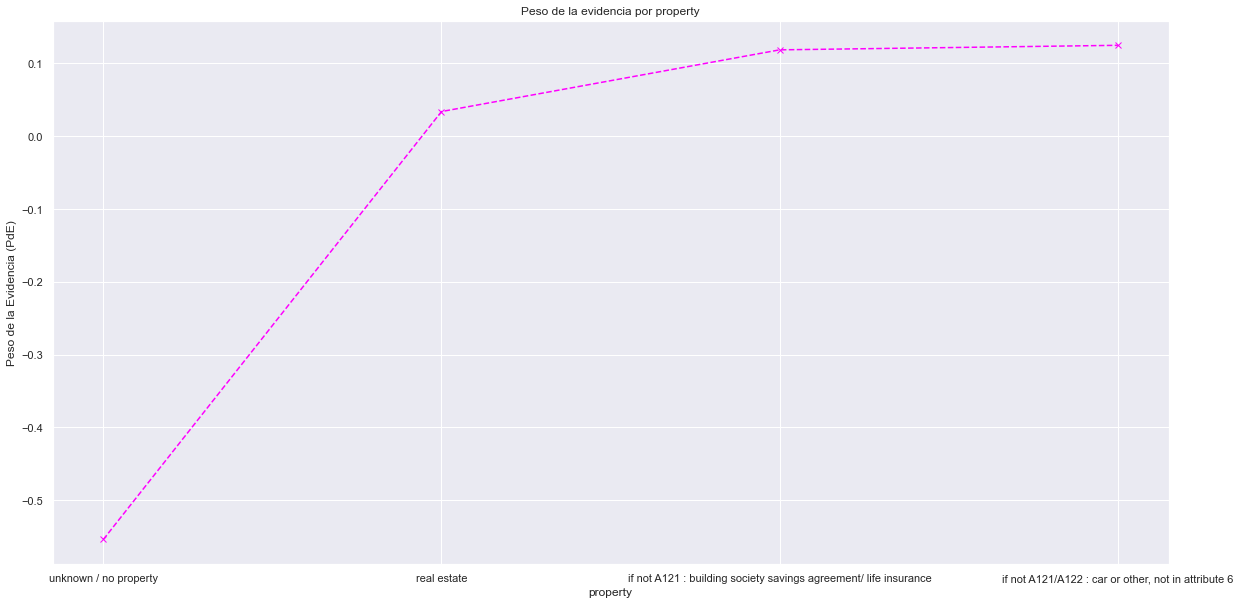

In [279]:
grafico_PdE(df_prueba)

In [280]:
X_train["Property_middle"] = sum([X_train["Property_if not A121/A122 : car or other, not in attribute 6"],
                                  X_train["Property_if not A121 : building society savings agreement/ life insurance"]])

In [281]:
df_prueba = PdE_categorica(X_train, "other_installment_plans", y_train)
df_prueba

other_installment_plans  observaciones  prop_bueno  proporcion_obs  \
0                    bank             12    0.500000            0.12   
1                  stores              6    0.666667            0.06   
2                    none             82    0.695122            0.82   

   n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0       6.0      6.0       0.089552      0.181818 -0.708185   
1       4.0      2.0       0.059701      0.060606 -0.015038   
2      57.0     25.0       0.850746      0.757576  0.115990   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.065341     0.076162  
1             0.029851   0.693147  0.000014     0.076162  
2             0.791045   0.131028  0.010807     0.076162

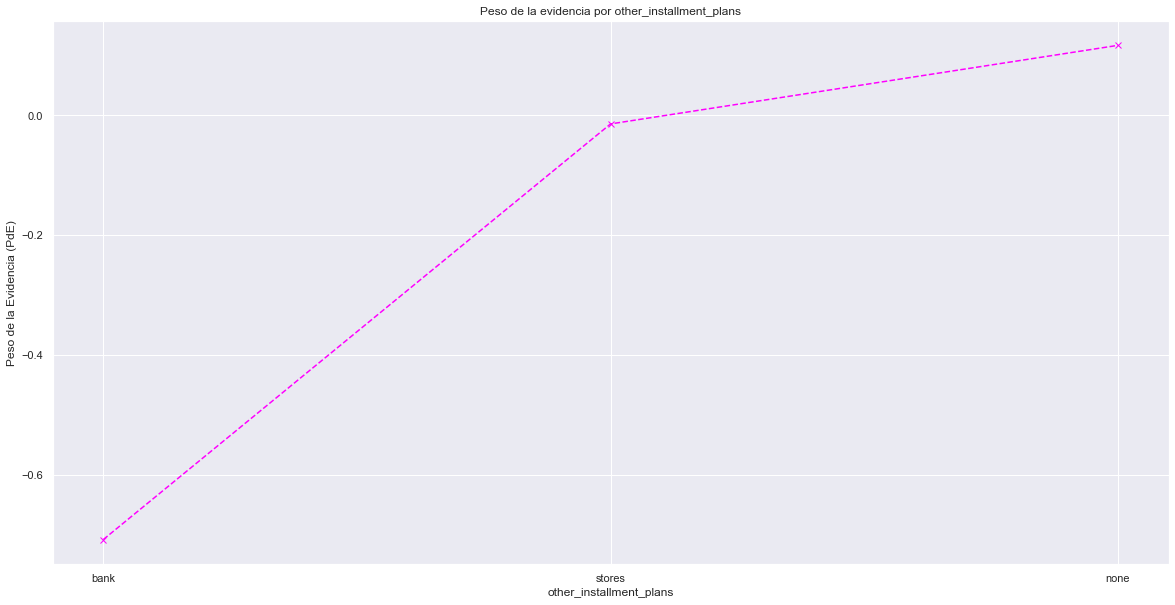

In [282]:
grafico_PdE(df_prueba)

In [283]:
X_train["Other_installment_plans_stores_bank"] = sum([X_train["Other_installment_plans_stores"],
                                                      X_train["Other_installment_plans_bank"]])

In [284]:
df_prueba = PdE_categorica(X_train, "housing", y_train)
df_prueba

housing  observaciones  prop_bueno  proporcion_obs  n_buenos  n_malos  \
0      rent             18    0.555556            0.18      10.0      8.0   
1  for free             11    0.636364            0.11       7.0      4.0   
2       own             71    0.704225            0.71      50.0     21.0   

   prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  delta_PdE  \
0       0.149254      0.242424 -0.485042                  NaN        NaN   
1       0.104478      0.121212 -0.148569             0.044776   0.336472   
2       0.746269      0.636364  0.159316             0.641791   0.307885   

         VI  sumatoriaVI  
0  0.045192     0.065187  
1  0.002486     0.065187  
2  0.017510     0.065187

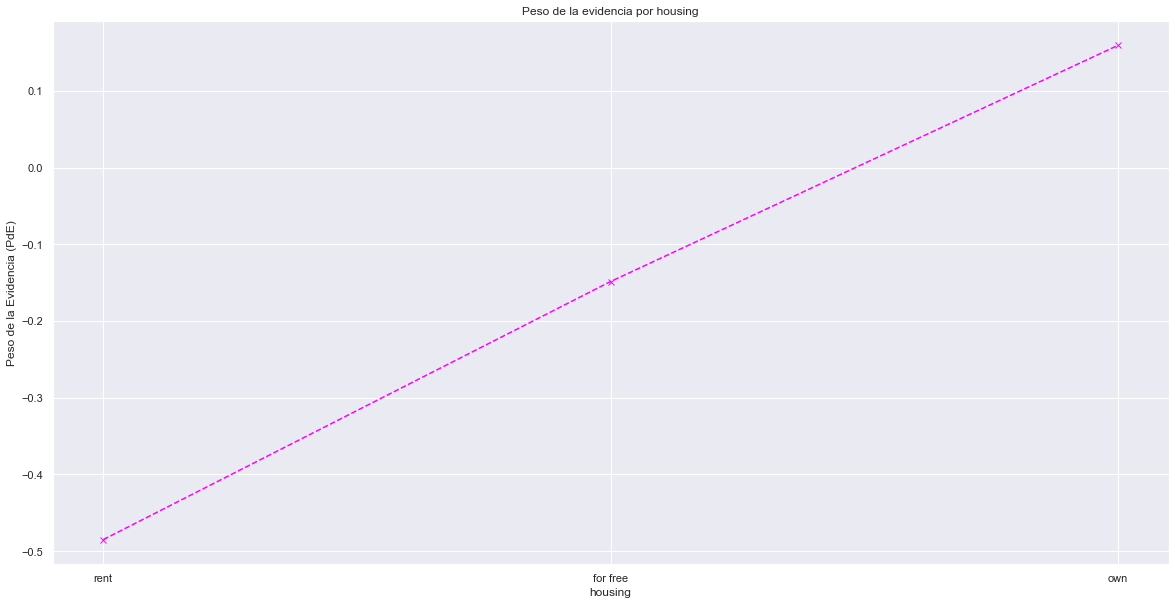

In [285]:
grafico_PdE(df_prueba)

In [286]:
X_train["Housing_free_rent"] = sum([X_train["Housing_for free"],
                                    X_train["Housing_rent"]])

In [287]:
df_prueba = PdE_categorica(X_train, "job", y_train)
df_prueba

job  observaciones  \
0               unemployed/ unskilled - non-resident              4   
1                               unskilled - resident             23   
2                        skilled employee / official             66   
3  management/ self-employed/ highly qualified em...              7   

   prop_bueno  proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos  \
0    0.500000            0.04       2.0      2.0       0.029851      0.060606   
1    0.652174            0.23      15.0      8.0       0.223881      0.242424   
2    0.666667            0.66      44.0     22.0       0.656716      0.666667   
3    0.857143            0.07       6.0      1.0       0.089552      0.030303   

        PdE  delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0 -0.708185                  NaN        NaN  0.021780     0.087607  
1 -0.079576             0.194030   0.628609  0.001476     0.087607  
2 -0.015038             0.432836   0.064539  0.000150     0.087607  
3  1.083574             0.567164   1.098612  0.064201     0.087607

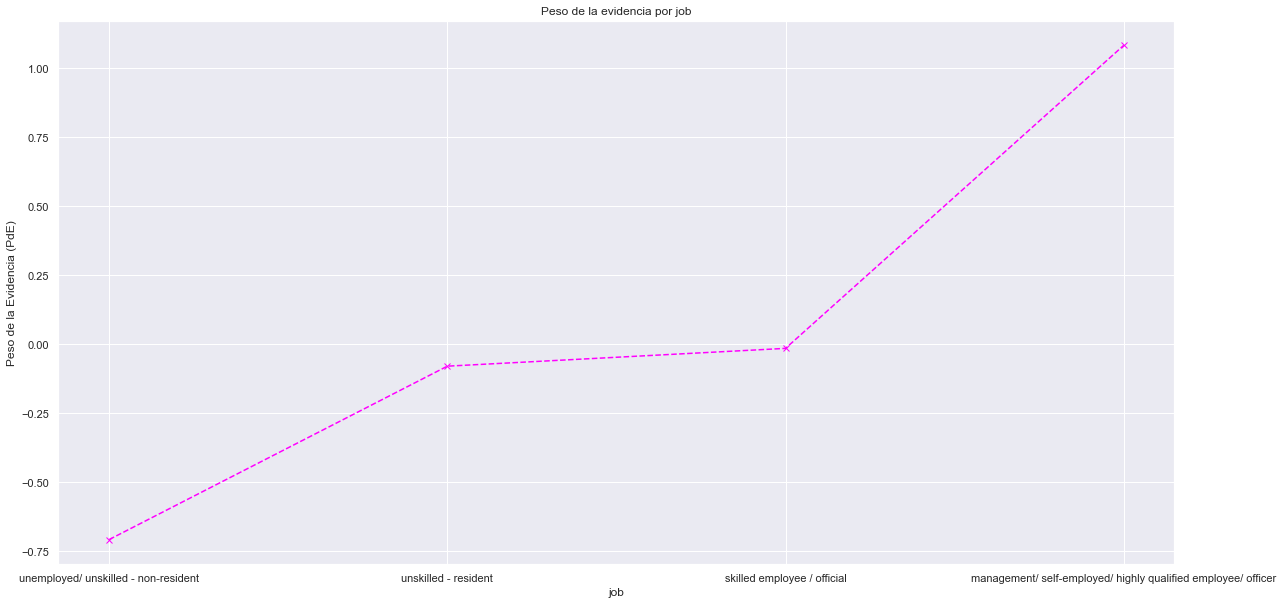

In [288]:
grafico_PdE(df_prueba)

In [289]:
X_train["Job_unemployed_unskilled"] = sum([X_train["Job_unemployed/ unskilled - non-resident"],
                                           X_train["Job_unskilled - resident"]])

In [290]:
df_prueba = PdE_categorica(X_train, "telephone", y_train)
df_prueba

telephone  observaciones  prop_bueno  \
0  yes, registered under the customers name              32    0.656250   
1                                       none             68    0.676471   

   proporcion_obs  n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0            0.32      21.0     11.0       0.313433      0.333333 -0.061558   
1            0.68      46.0     22.0       0.686567      0.666667  0.029414   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.001225      0.00181  
1             0.373134   0.090972  0.000585      0.00181

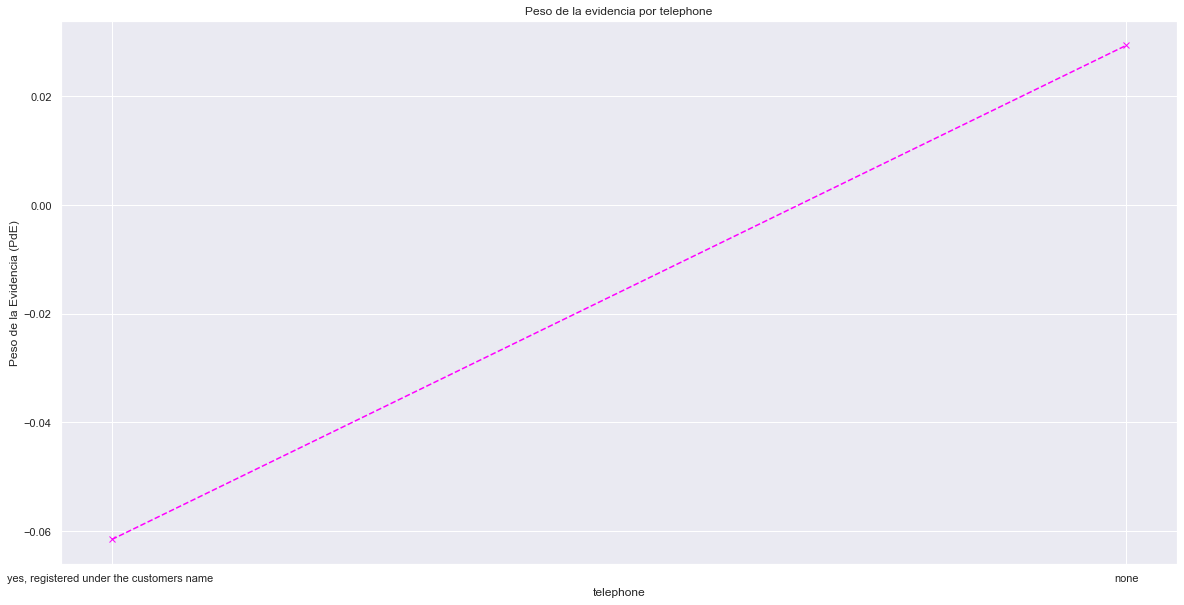

In [291]:
grafico_PdE(df_prueba)

In [292]:
df_prueba = PdE_categorica(X_train, "foreign_worker", y_train)
df_prueba

foreign_worker  observaciones  prop_bueno  proporcion_obs  n_buenos  \
0            yes             96     0.65625            0.96      63.0   
1             no              4     1.00000            0.04       4.0   

   n_malos  prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  \
0     33.0       0.940299           1.0 -0.061558                  NaN   
1      0.0       0.059701           0.0       NaN             0.880597   

   delta_PdE        VI  sumatoriaVI  
0        NaN  0.003675     0.003675  
1        NaN       NaN     0.003675

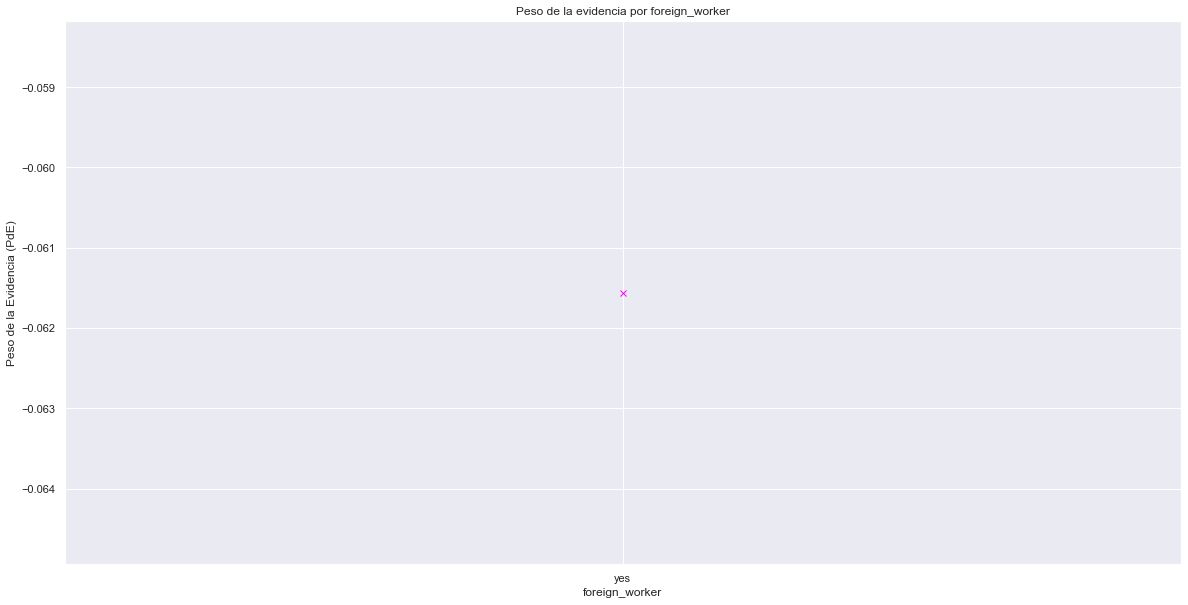

In [293]:
grafico_PdE(df_prueba)

# Now the Numeric Values

In [294]:
X_train[["duration_in_month","credit_amount", "installment_as_income_perc", "present_res_since", "age", "credits_this_bank", "people_under_maintenance"]].head()

duration_in_month  credit_amount  installment_as_income_perc  \
890                 27           2442                           4   
983                 36           8229                           2   
107                 12           6078                           2   
609                 15           1300                           4   
113                 36           7855                           4   

     present_res_since  age  credits_this_bank  people_under_maintenance  
890                  4   43                  4                         2  
983                  2   26                  1                         2  
107                  2   32                  1                         1  
609                  4   45                  1                         2  
113                  2   25                  2                         1


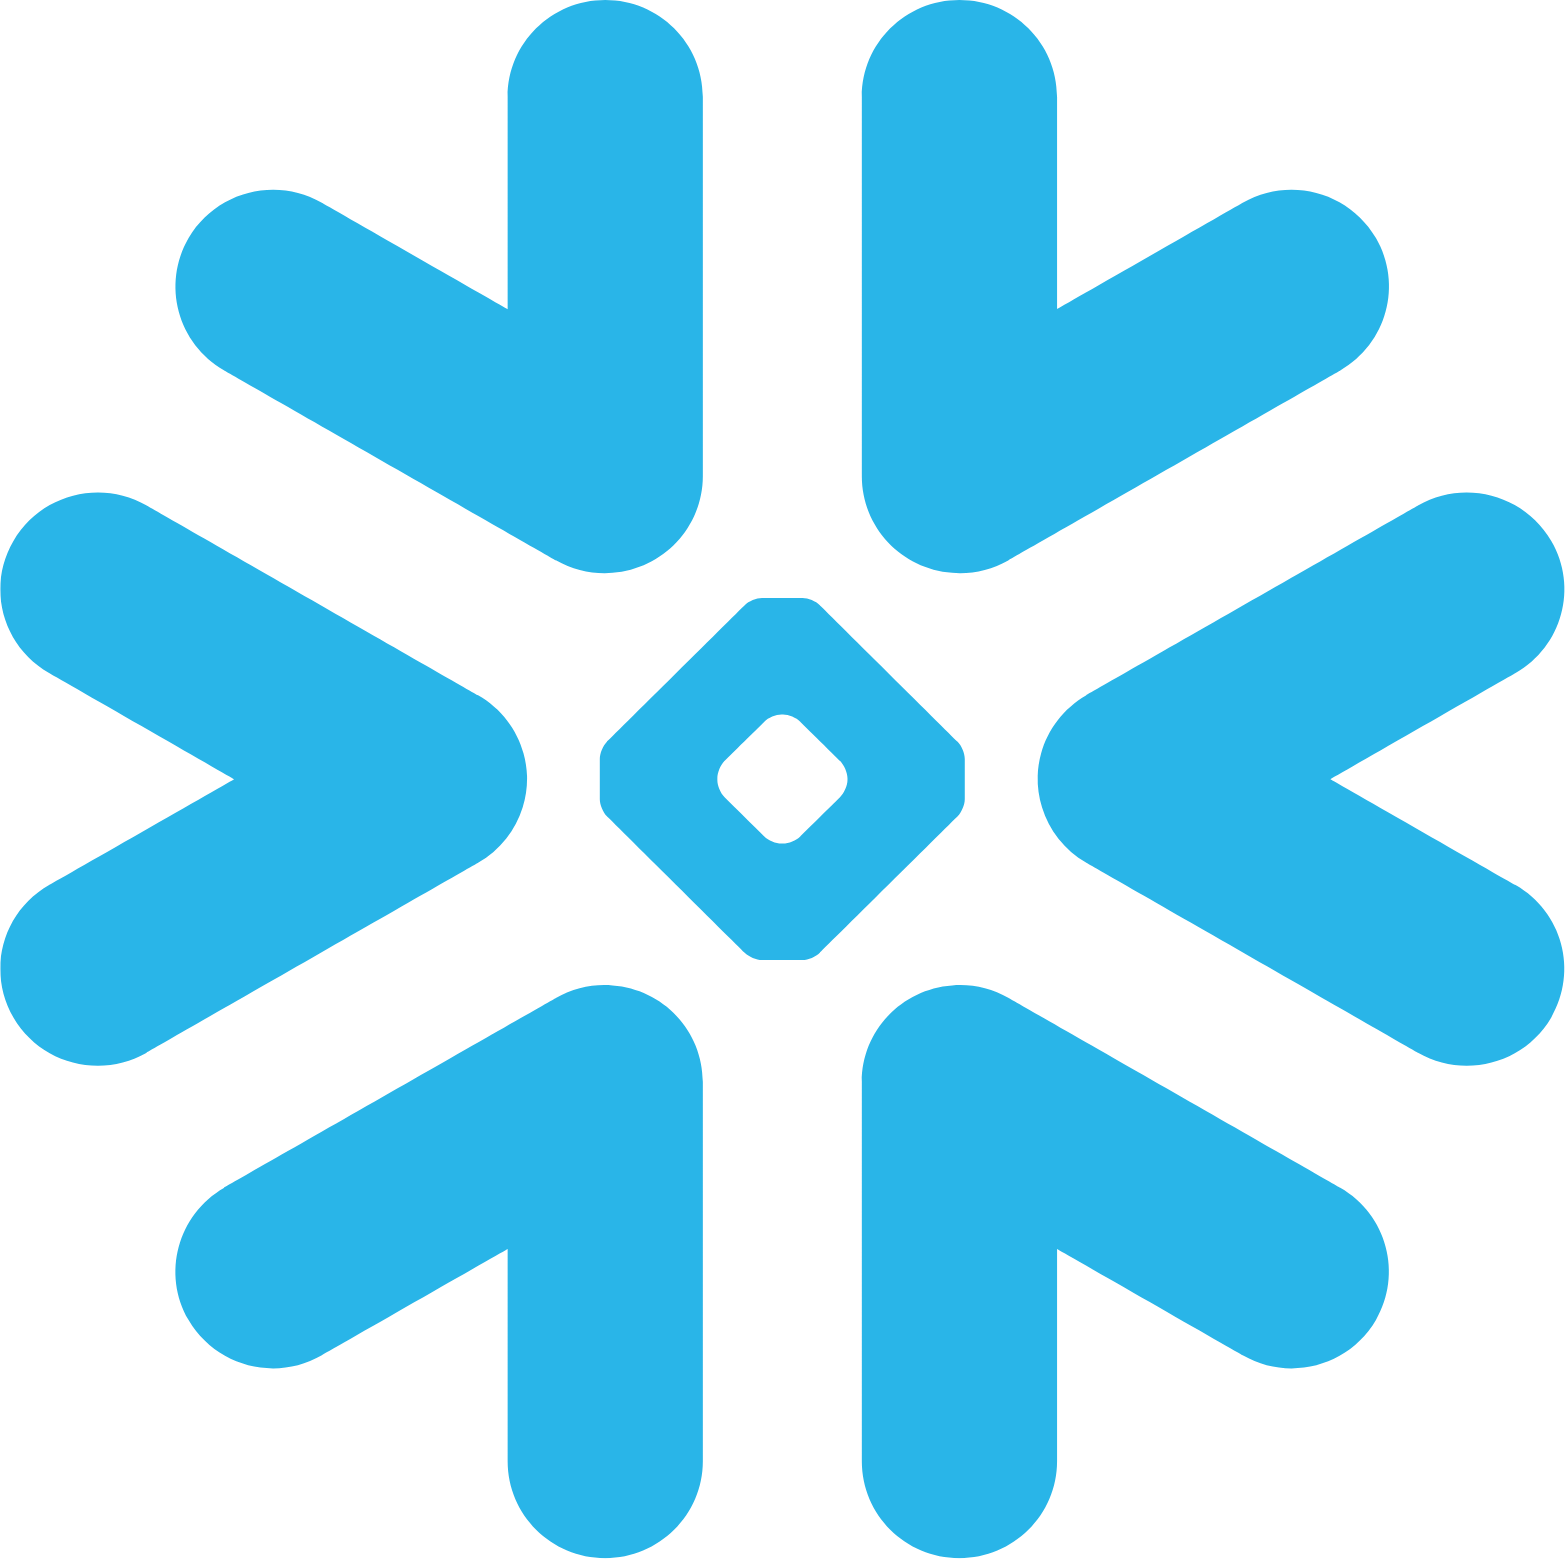

In [295]:
mitosheet.sheet(X_train[["duration_in_month","credit_amount", "installment_as_income_perc", "present_res_since", "age", "credits_this_bank", "people_under_maintenance"]], analysis_to_replay="id-mupcrxyldc")

In [296]:
# Create a function but now for the numeric variables
def PdE_continua(df, var_categorica, df_var_dependiente):
    df = pd.concat([df[var_categorica], df_var_dependiente], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'observaciones', 'prop_bueno']
    df['proporcion_obs'] = df['observaciones']/df['observaciones'].sum()
    df['n_buenos'] = df['prop_bueno']*df['observaciones']
    df['n_malos'] = (1- df['prop_bueno'])*df['observaciones'] 
    df['prop_n_buenos'] = df['n_buenos']/df['n_buenos'].sum()
    df['prop_n_malos'] = df['n_malos']/df['n_malos'].sum() 
    df['PdE'] = np.log(df['prop_n_buenos']/df['prop_n_malos'])
    # df = df.sort_values(['PdE'])
    # df = df.reset_index(drop = True)
    df['delta_prop_n_buenos'] = df['prop_n_buenos'].diff().abs() 
    df['delta_PdE'] = df['PdE'].diff().abs() #Diferencia Absoluta entre categorías
    df['VI'] = (df['prop_n_buenos'] - df['prop_n_malos']) * df['PdE']
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df['sumatoriaVI'] = df['VI'].sum()
    return df

In [297]:
# Start with the people_under_maintenance
df_prueba = PdE_continua(X_train, "people_under_maintenance", y_train)
df_prueba

people_under_maintenance  observaciones  prop_bueno  proporcion_obs  \
0                         1             84    0.666667            0.84   
1                         2             16    0.687500            0.16   

   n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0      56.0     28.0       0.835821      0.848485 -0.015038   
1      11.0      5.0       0.164179      0.151515  0.080272   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.000190     0.001207  
1             0.671642    0.09531  0.001017     0.001207

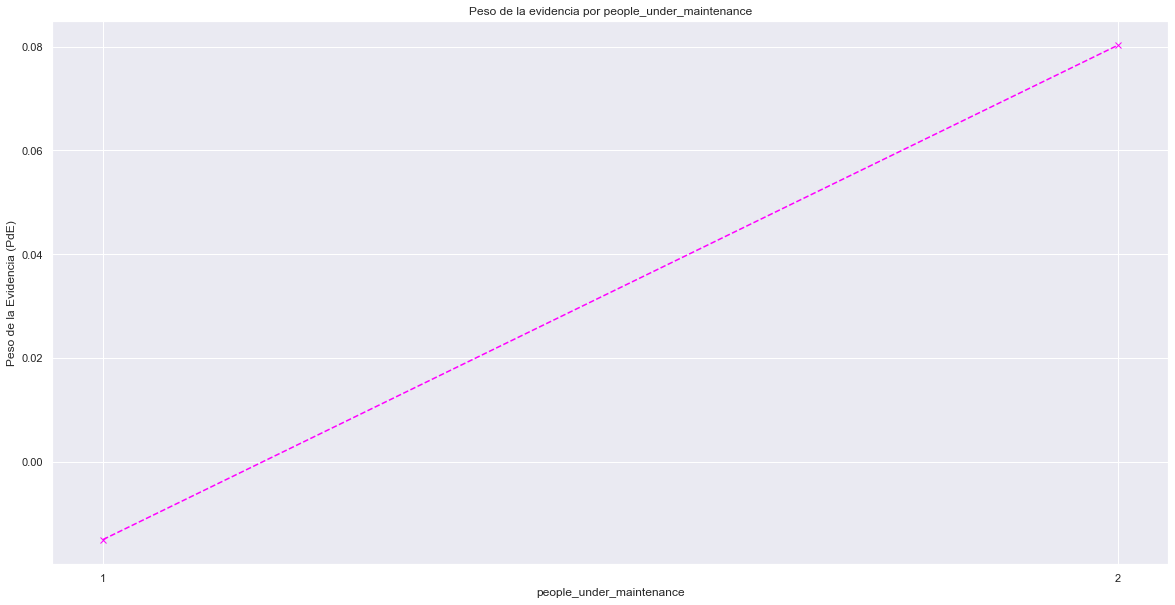

In [298]:
grafico_PdE(df_prueba)

In [299]:
X_train["People_under_maintenance_2"] = np.where(X_train["people_under_maintenance"] == 2, 1, 0)
X_train["People_under_maintenance_1"] = np.where(X_train["people_under_maintenance"] == 1, 1, 0)

In [300]:
# Credits_this_bank
X_train["credits_this_bank"].unique()

array([4, 1, 2, 3])

In [301]:
df_prueba = PdE_continua(X_train, "credits_this_bank", y_train)
df_prueba

credits_this_bank  observaciones  prop_bueno  proporcion_obs  n_buenos  \
0                  1             68    0.676471            0.68      46.0   
1                  2             28    0.642857            0.28      18.0   
2                  3              3    0.666667            0.03       2.0   
3                  4              1    1.000000            0.01       1.0   

   n_malos  prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  \
0     22.0       0.686567      0.666667  0.029414                  NaN   
1     10.0       0.268657      0.303030 -0.120398             0.417910   
2      1.0       0.029851      0.030303 -0.015038             0.238806   
3      0.0       0.014925      0.000000       NaN             0.014925   

   delta_PdE        VI  sumatoriaVI  
0        NaN  0.000585     0.004731  
1   0.149812  0.004139     0.004731  
2   0.105361  0.000007     0.004731  
3        NaN       NaN     0.004731

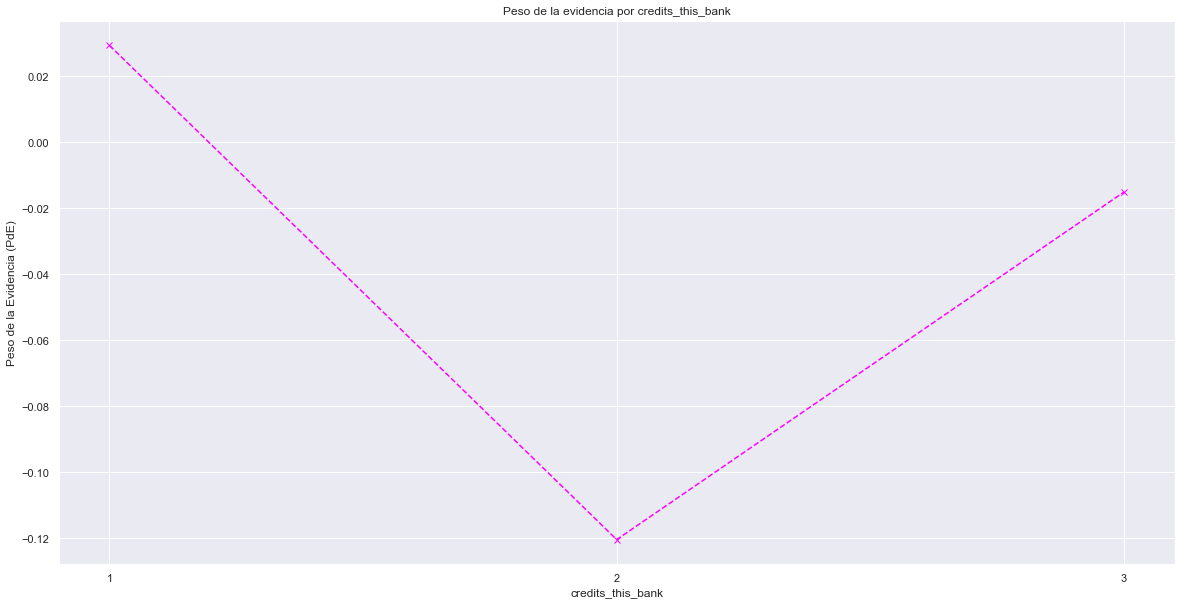

In [302]:
grafico_PdE(df_prueba)

In [303]:
X_train["Credits_this_bank_1"] = np.where(X_train["credits_this_bank"] == 1, 1, 0)
X_train["Credits_this_bank_2"] = np.where(X_train["credits_this_bank"] == 2, 1, 0)
X_train["Credits_this_bank_3"] = np.where(X_train["credits_this_bank"] == 3, 1, 0)
X_train["Credits_this_bank_4"] = np.where(X_train["credits_this_bank"] == 4, 1, 0)

In [304]:
# For Age
X_train["age"].unique()

array([43, 26, 32, 45, 25, 23, 48, 27, 41, 39, 37, 54, 51, 28, 46, 29, 35,
       31, 22, 34, 38, 63, 47, 55, 36, 52, 21, 44, 20, 24, 40, 33, 66, 30])

In [305]:
X_train["Age_categories"] = pd.cut(X_train["age"], bins=[18, 30, 40, 50, 60, 70, 80], labels=[1, 2, 3, 4, 5, 6])

In [306]:
X_train["Age_categories"]

890    3
983    1
107    2
609    3
113    1
      ..
681    2
63     1
152    1
498    2
618    1
Name: Age_categories, Length: 100, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [307]:
df_prueba = PdE_continua(X_train, "Age_categories", y_train)
df_prueba

Age_categories  observaciones  prop_bueno  proporcion_obs  n_buenos  \
0              1             42    0.547619            0.42      23.0   
1              2             33    0.818182            0.33      27.0   
2              3             17    0.588235            0.17      10.0   
3              4              6    0.833333            0.06       5.0   
4              5              2    1.000000            0.02       2.0   
5              6              0         NaN            0.00       NaN   

   n_malos  prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  \
0     19.0       0.343284      0.575758 -0.517130                  NaN   
1      6.0       0.402985      0.181818  0.795892             0.059701   
2      7.0       0.149254      0.212121 -0.351510             0.253731   
3      1.0       0.074627      0.030303  0.901253             0.074627   
4      0.0       0.029851      0.000000       NaN             0.044776   
5      NaN            NaN           NaN       NaN                  NaN   

   delta_PdE        VI  sumatoriaVI  
0        NaN  0.120219      0.35829  
1   1.313022  0.176025      0.35829  
2   1.147402  0.022099      0.35829  
3   1.252763  0.039947      0.35829  
4        NaN       NaN      0.35829  
5        NaN       NaN      0.35829

In [308]:
# Change the graph a little bit
def grafico_PdE_v(df):
    x = np.array(df.iloc[:,0].apply(str)) 
    y = df["PdE"]
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, marker="x", linestyle="--", color="magenta")
    plt.xlabel(df.columns[0])
    plt.ylabel('Peso de la Evidencia (PdE)')
    plt.title(str('Peso de la evidencia por ' + df.columns[0]))
    plt.xticks(rotation=90)

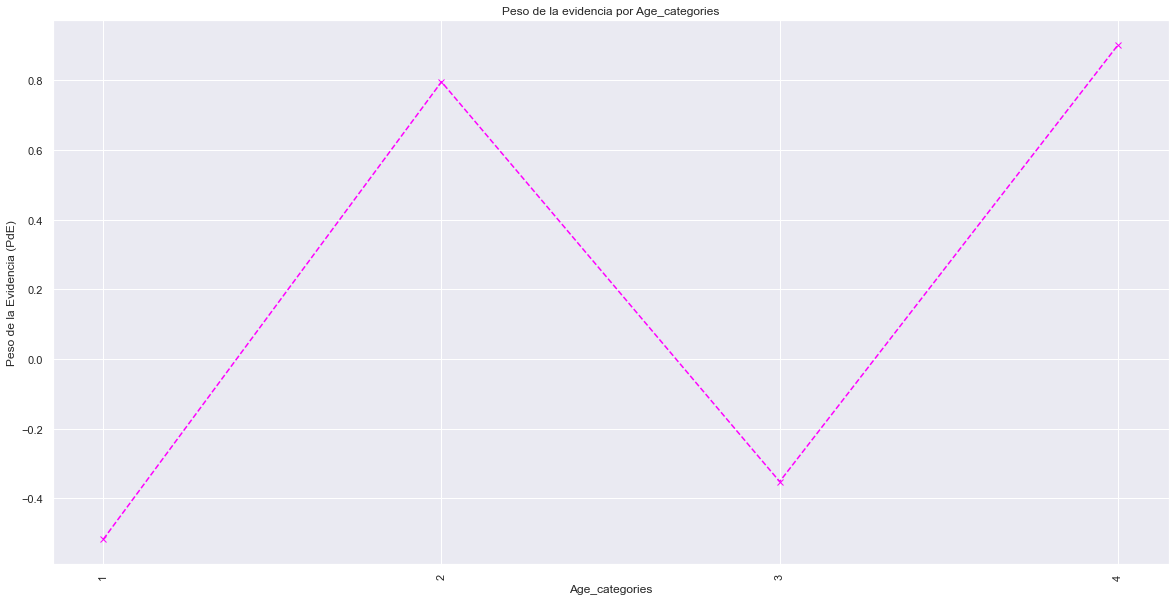

In [309]:
grafico_PdE_v(df_prueba)

In [310]:
# Lets just make 6 different dummie variables for the age bins
X_train["Age_1"] = np.where(X_train["Age_categories"] == 1, 1, 0)
X_train["Age_2"] = np.where(X_train["Age_categories"] == 2, 1, 0)
X_train["Age_3"] = np.where(X_train["Age_categories"] == 3, 1, 0)
X_train["Age_4"] = np.where(X_train["Age_categories"] == 4, 1, 0)
X_train["Age_5"] = np.where(X_train["Age_categories"] == 5, 1, 0)
X_train["Age_6"] = np.where(X_train["Age_categories"] == 6, 1, 0)

In [311]:
# For duration in month
X_train["duration_in_month"].unique()

array([27, 36, 12, 15,  9, 10, 21,  6, 24, 48, 14, 16, 30, 18, 28, 42, 11,
       22, 20])

In [312]:
X_train["Duration_in_month_categories"] = pd.cut(X_train["duration_in_month"], bins=[1, 12, 24, 36, 48, 60, 72], labels=[1, 2, 3, 4, 5, 6])

In [313]:
df_prueba = PdE_continua(X_train, "Duration_in_month_categories", y_train)
df_prueba

Duration_in_month_categories  observaciones  prop_bueno  proporcion_obs  \
0                            1             39    0.794872            0.39   
1                            2             39    0.692308            0.39   
2                            3             14    0.500000            0.14   
3                            4              8    0.250000            0.08   
4                            5              0         NaN            0.00   
5                            6              0         NaN            0.00   

   n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0      31.0      8.0       0.462687      0.242424  0.646361   
1      27.0     12.0       0.402985      0.363636  0.102745   
2       7.0      7.0       0.104478      0.212121 -0.708185   
3       2.0      6.0       0.029851      0.181818 -1.806797   
4       NaN      NaN            NaN           NaN       NaN   
5       NaN      NaN            NaN           NaN       NaN   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.142369     0.497218  
1             0.059701   0.543615  0.004043     0.497218  
2             0.298507   0.810930  0.076232     0.497218  
3             0.074627   1.098612  0.274574     0.497218  
4                  NaN        NaN       NaN     0.497218  
5                  NaN        NaN       NaN     0.497218

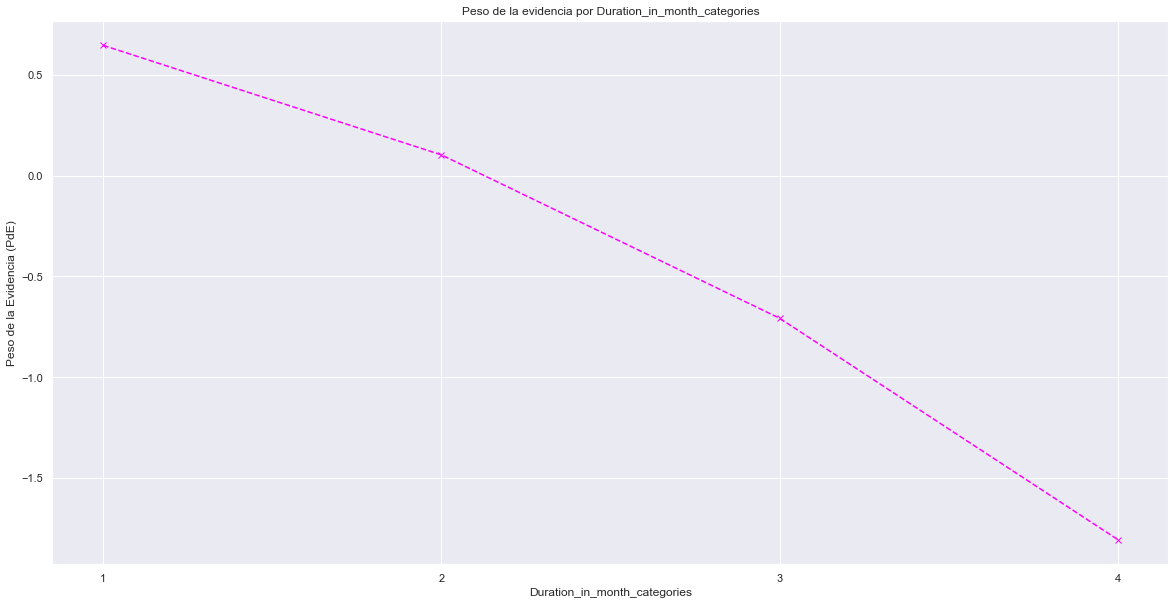

In [314]:
grafico_PdE(df_prueba)

In [315]:
X_train["Duration_in_month_1"] = np.where(X_train["Duration_in_month_categories"] == 1, 1, 0)
X_train["Duration_in_month_2"] = np.where(X_train["Duration_in_month_categories"] == 2, 1, 0)
X_train["Duration_in_month_3"] = np.where(X_train["Duration_in_month_categories"] == 3, 1, 0)
X_train["Duration_in_month_4"] = np.where(X_train["Duration_in_month_categories"] == 4, 1, 0)
X_train["Duration_in_month_5"] = np.where(X_train["Duration_in_month_categories"] >= 5, 1, 0)

In [316]:
# credit_amount
X_train["Credit_amount_categories"] = pd.cut(X_train["credit_amount"], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [317]:
df_prueba = PdE_continua(X_train, "Credit_amount_categories", y_train)
df_prueba

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



Credit_amount_categories  observaciones  prop_bueno  proporcion_obs  \
0                         1              9    0.777778            0.09   
1                         2             32    0.750000            0.32   
2                         3             23    0.782609            0.23   
3                         4             12    0.500000            0.12   
4                         5              6    0.333333            0.06   
5                         6              4    0.750000            0.04   
6                         7              5    0.400000            0.05   
7                         8              4    0.750000            0.04   
8                         9              2    0.500000            0.02   
9                        10              1    1.000000            0.01   
10                       11              0         NaN            0.00   
11                       12              0         NaN            0.00   
12                       13              1    0.000000            0.01   
13                       14              0         NaN            0.00   
14                       15              1    0.000000            0.01   
15                       16              0         NaN            0.00   
16                       17              0         NaN            0.00   
17                       18              0         NaN            0.00   
18                       19              0         NaN            0.00   
19                       20              0         NaN            0.00   

    n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0        7.0      2.0       0.104478      0.060606  0.544578   
1       24.0      8.0       0.358209      0.242424  0.390427   
2       18.0      5.0       0.268657      0.151515  0.572749   
3        6.0      6.0       0.089552      0.181818 -0.708185   
4        2.0      4.0       0.029851      0.121212 -1.401332   
5        3.0      1.0       0.044776      0.030303  0.390427   
6        2.0      3.0       0.029851      0.090909 -1.113650   
7        3.0      1.0       0.044776      0.030303  0.390427   
8        1.0      1.0       0.014925      0.030303 -0.708185   
9        1.0      0.0       0.014925      0.000000       NaN   
10       NaN      NaN            NaN           NaN       NaN   
11       NaN      NaN            NaN           NaN       NaN   
12       0.0      1.0       0.000000      0.030303       NaN   
13       NaN      NaN            NaN           NaN       NaN   
14       0.0      1.0       0.000000      0.030303       NaN   
15       NaN      NaN            NaN           NaN       NaN   
16       NaN      NaN            NaN           NaN       NaN   
17       NaN      NaN            NaN           NaN       NaN   
18       NaN      NaN            NaN           NaN       NaN   
19       NaN      NaN            NaN           NaN       NaN   

    delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                   NaN        NaN  0.023891     0.419748  
1              0.253731   0.154151  0.045206     0.419748  
2              0.089552   0.182322  0.067093     0.419748  
3              0.179104   1.280934  0.065341     0.419748  
4              0.059701   0.693147  0.128028     0.419748  
5              0.014925   1.791759  0.005651     0.419748  
6              0.014925   1.504077  0.067998     0.419748  
7              0.014925   1.504077  0.005651     0.419748  
8              0.029851   1.098612  0.010890     0.419748  
9              0.000000        NaN       NaN     0.419748  
10                  NaN        NaN       NaN     0.419748  
11                  NaN        NaN       NaN     0.419748  
12                  NaN        NaN       NaN     0.419748  
13                  NaN        NaN       NaN     0.419748  
14                  NaN        NaN       NaN     0.419748  
15                  NaN        NaN       NaN     0.419748  
16                  NaN        NaN       NaN     0.419748  
17                  NaN

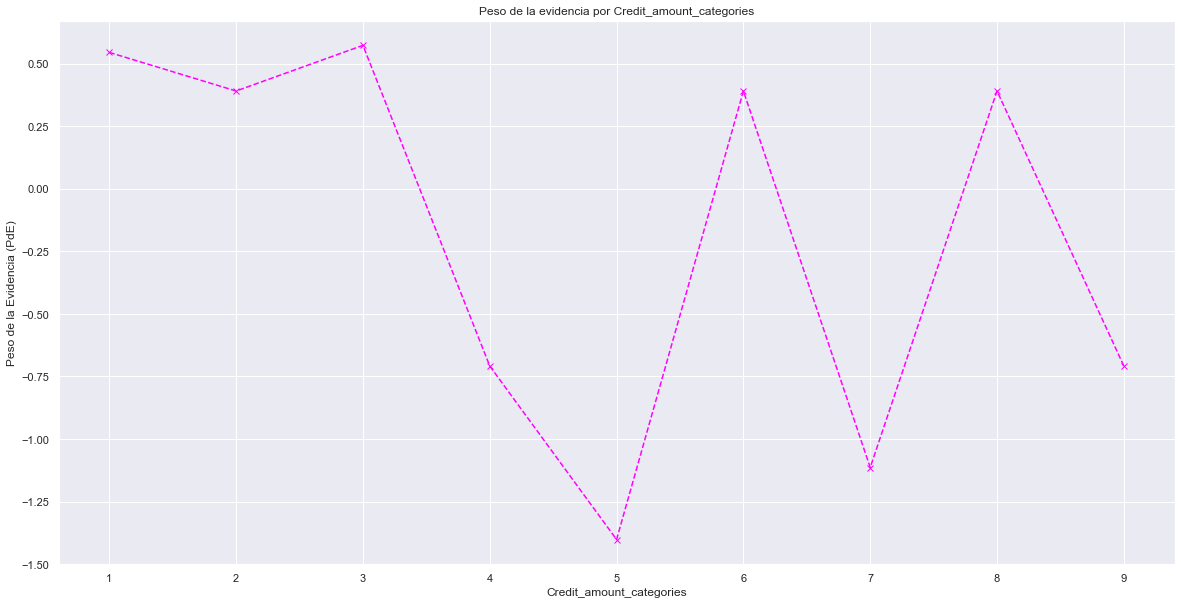

In [318]:
grafico_PdE(df_prueba)

In [319]:
X_train["Credit_amount_1"] = np.where(X_train["Credit_amount_categories"] < 5, 1, 0)
X_train["Credit_amount_2"] = np.where((X_train["Credit_amount_categories"] >= 5) & (X_train["Credit_amount_categories"] <= 10), 1, 0)
X_train["Credit_amount_3"] = np.where(X_train["Credit_amount_categories"] >= 11, 1, 0)

In [320]:
# installment_as_income_perc
X_train["installment_as_income_perc"].unique()

array([4, 2, 1, 3])

In [321]:
df_prueba = PdE_continua(X_train, "installment_as_income_perc", y_train)
df_prueba

installment_as_income_perc  observaciones  prop_bueno  proporcion_obs  \
0                           1             11    0.727273            0.11   
1                           2             25    0.600000            0.25   
2                           3             19    0.684211            0.19   
3                           4             45    0.688889            0.45   

   n_buenos  n_malos  prop_n_buenos  prop_n_malos       PdE  \
0       8.0      3.0       0.119403      0.090909  0.272644   
1      15.0     10.0       0.223881      0.303030 -0.302720   
2      13.0      6.0       0.194030      0.181818  0.065005   
3      31.0     14.0       0.462687      0.424242  0.086745   

   delta_prop_n_buenos  delta_PdE        VI  sumatoriaVI  
0                  NaN        NaN  0.007769     0.035858  
1             0.104478   0.575364  0.023960     0.035858  
2             0.029851   0.367725  0.000794     0.035858  
3             0.268657   0.021740  0.003335     0.035858

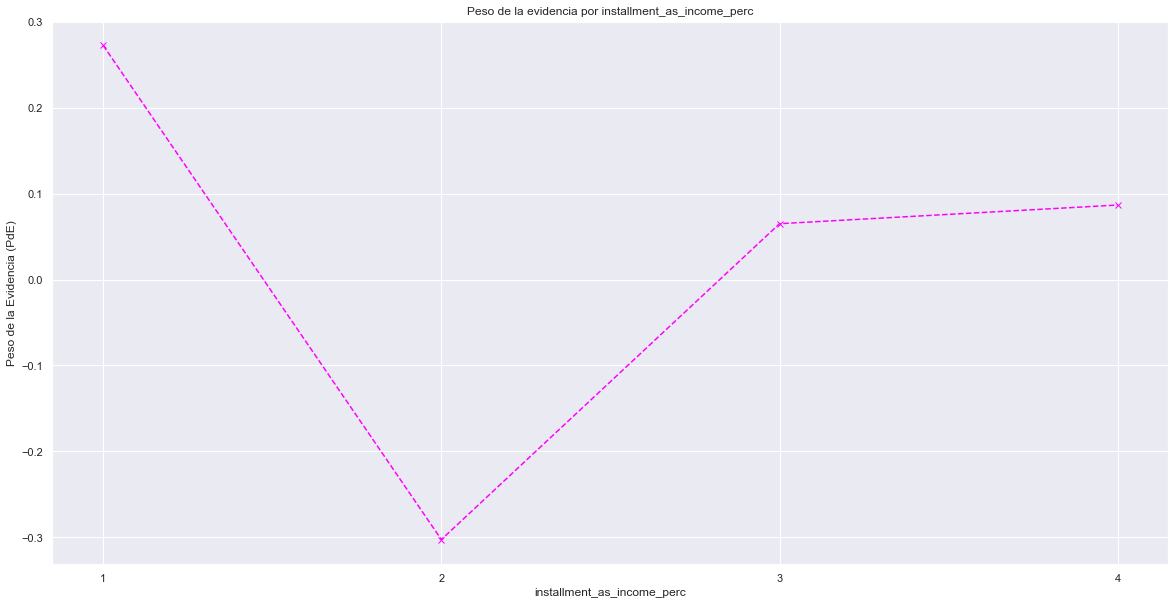

In [322]:
grafico_PdE(df_prueba)

In [323]:
X_train["Installment_as_income_perc_1"] = np.where(X_train["installment_as_income_perc"] == 1, 1, 0)
X_train["Installment_as_income_perc_2"] = np.where(X_train["installment_as_income_perc"] == 2, 1, 0)
X_train["Installment_as_income_perc_3"] = np.where(X_train["installment_as_income_perc"] == 3, 1, 0)
X_train["Installment_as_income_perc_4"] = np.where(X_train["installment_as_income_perc"] == 4, 1, 0)

In [324]:
# present_res_since
X_train["present_res_since"].unique()

array([4, 2, 3, 1])

In [325]:
df_prueba = PdE_continua(X_train, "present_res_since", y_train)
df_prueba

present_res_since  observaciones  prop_bueno  proporcion_obs  n_buenos  \
0                  1              8    0.750000            0.08       6.0   
1                  2             36    0.694444            0.36      25.0   
2                  3             13    0.692308            0.13       9.0   
3                  4             43    0.627907            0.43      27.0   

   n_malos  prop_n_buenos  prop_n_malos       PdE  delta_prop_n_buenos  \
0      2.0       0.089552      0.060606  0.390427                  NaN   
1     11.0       0.373134      0.333333  0.112795             0.283582   
2      4.0       0.134328      0.121212  0.102745             0.238806   
3     16.0       0.402985      0.484848 -0.184937             0.268657   

   delta_PdE        VI  sumatoriaVI  
0        NaN  0.011301     0.032278  
1   0.277632  0.004489     0.032278  
2   0.010050  0.001348     0.032278  
3   0.287682  0.015140     0.032278

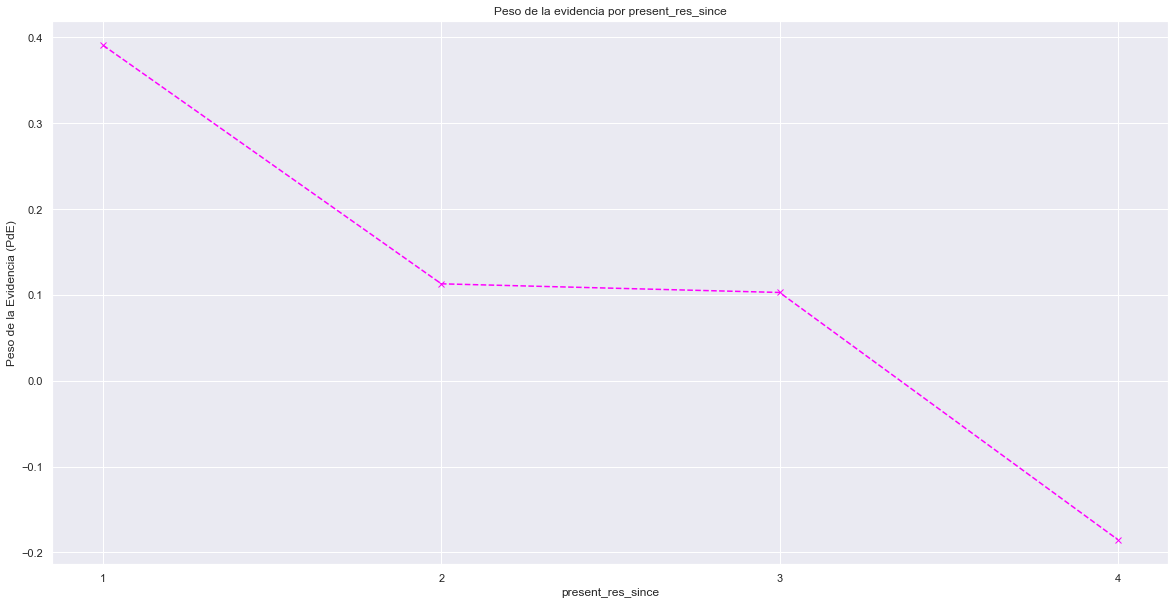

In [326]:
grafico_PdE(df_prueba)

In [327]:
X_train["Present_res_since_1"] = np.where(X_train["present_res_since"] == 1, 1, 0)
X_train["Present_res_since_2"] = np.where(X_train["present_res_since"] == 2, 1, 0)
X_train["Present_res_since_3"] = np.where(X_train["present_res_since"] == 3, 1, 0)
X_train["Present_res_since_4"] = np.where(X_train["present_res_since"] == 4, 1, 0)

In [328]:
# Save just in case
#X_train.to_csv("X_train.csv", sep=",", index=False)
#y_train.to_csv("y_train.csv", sep=",", index=False)
#X_test.to_csv("X_test.csv", sep=",", index=False)
#y_test.to_csv("y_test.csv", sep=",", index=False)

# Preprocess the testing data

In [329]:
#datos_guardados_X_train = X_train
#datos_guardados_y_train = y_train

In [332]:
# Now get the 4 dataframes 

In [333]:
datos_guardados_X_test = X_train
datos_guardados_y_test = y_train

In [340]:
datos_guardados_X_train.to_csv("X_train.csv")
datos_guardados_y_train.to_csv("y_train.csv")
datos_guardados_X_test.to_csv("X_test.csv")
datos_guardados_y_test.to_csv("y_test.csv")